In [4]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn .model_selection import train_test_split
import random

In [5]:
uploaded =files.upload()

Saving heart.csv to heart.csv


In [6]:
data=pd.read_csv("heart.csv")

In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
data.tail()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
data.shape

(918, 12)

In [11]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

correlation between Cholesterol and Blood Pressure 0.10089294207709194


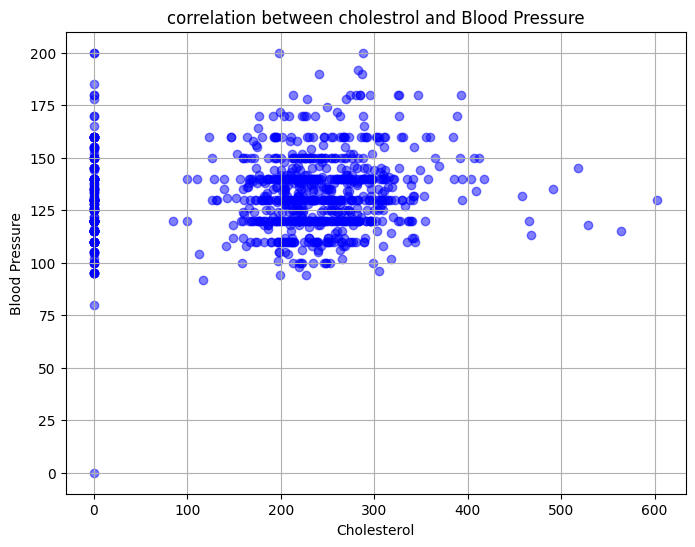

In [14]:
correlation_df=data[["Cholesterol","RestingBP"]]
correlation=correlation_df["Cholesterol"].corr(correlation_df["RestingBP"])
print(f"correlation between Cholesterol and Blood Pressure {correlation}")
plt.figure(figsize=(8,6))
plt.scatter(correlation_df["Cholesterol"],correlation_df["RestingBP"],color="blue",alpha=0.5)
plt.title("correlation between cholestrol and Blood Pressure")
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.grid(True)
plt.show()

In [15]:
age_groups=pd.cut(data["Age"],bins=[0,30,40,50,60,70,80] ,labels=["<30","30-40","40-50","50-60","60-70","70-80"])
heart_disease_count=data[data["HeartDisease"]==1].groupby([age_groups,"Sex"]).size().unstack()
most_common_chest_pain=data.groupby(age_groups)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
average_heartrate_byage=data.groupby(age_groups)["MaxHR"].mean()

In [16]:
print("heart disease cases and most common chest pain type by age groups and gender")
print(pd.concat([heart_disease_count,most_common_chest_pain,average_heartrate_byage],axis=1))


heart disease cases and most common chest pain type by age groups and gender
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


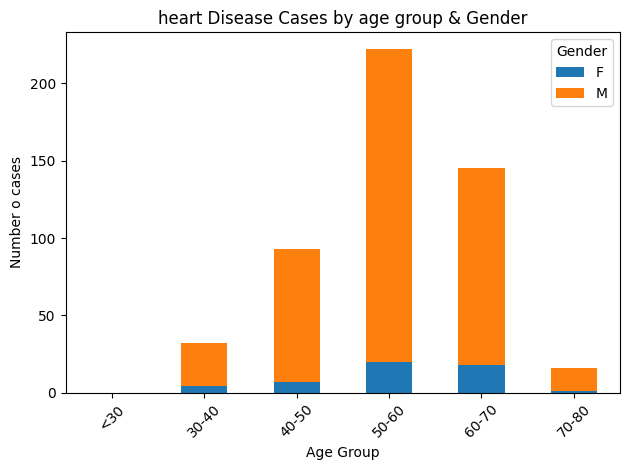

In [17]:
heart_disease_count.plot(kind="bar",stacked=True)
plt.title("heart Disease Cases by age group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number o cases")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [18]:
pip install scikit-learn

** Performing Features importance analysis with Ranodm Forest**

Ranked List of features by Importances
           Feature  Importances
10        ST_Slope     0.202490
2    ChestPainType     0.125556
9          Oldpeak     0.119303
7            MaxHR     0.113953
4      Cholesterol     0.110334
8   ExerciseAngina     0.084282
0              Age     0.080526
3        RestingBP     0.076613
1              Sex     0.037609
6       RestingECG     0.025513
5        FastingBS     0.023821


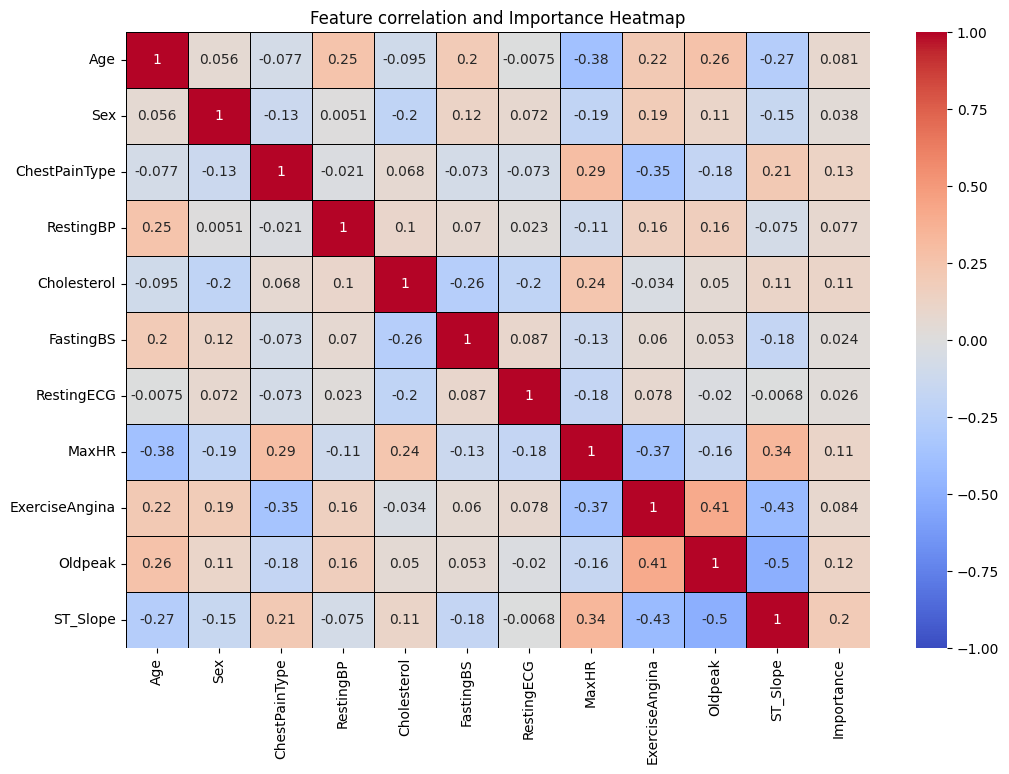

In [19]:
data.columns = data.columns.str.strip()  # Strip any leading/trailing whitespace characters

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separating features and target variable
x = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

# Training the Random Forest classifier
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(x, y)

# Getting feature importances
feature_importances = randomforest_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': x.columns, 'Importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importances', ascending=False)

# Printing the ranked list of features by importances
print("Ranked List of features by Importances")
print(feature_importances_df)

# Computing correlation matrix
corr_matrix = x.corr()

# Creating a DataFrame for the heatmap
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(importances_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor="black")
plt.title("Feature correlation and Importance Heatmap")
plt.show()

Building Heart Disease Detection Model with Random Forest

In [20]:
uploaded =files.upload()

Saving heart.csv to heart (1).csv


In [21]:
data1=pd.read_csv("heart (1).csv")

In [22]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming `data1` is your dataframe
x = data1.drop("HeartDisease", axis=1)
y = data1["HeartDisease"]
categories = {
    "ChestPainType": ['ATA', 'NAP', 'ASY', 'TA'],
    "Sex": ['M', 'F'],
    "RestingECG": ['Normal', 'ST', 'LVH'],
    "ExerciseAngina": ['N', 'Y'],
    "ST_Slope": ['Up', 'Flat', 'Down']
}

# Ensure columns match exactly by stripping extra spaces
x = x.rename(columns=lambda col: col.strip())
x = pd.get_dummies(x, columns=categories.keys())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(x_train, y_train)

random_data = {
    "Age": np.random.randint(20, 80),
    "Sex": np.random.choice(categories["Sex"]),
    "ChestPainType": np.random.choice(categories["ChestPainType"]),
    "RestingBP": np.random.randint(100, 200),
    "Cholesterol": np.random.randint(100, 300),
    "FastingBS": np.random.choice([0, 1]),
    "RestingECG": np.random.choice(categories["RestingECG"]),
    "MaxHR": np.random.randint(60, 220),
    "ExerciseAngina": np.random.choice(categories["ExerciseAngina"]),
    "Oldpeak": np.random.uniform(0, 5),
    "ST_Slope": np.random.choice(categories["ST_Slope"])
}

random_df = pd.DataFrame([random_data])
random_df = pd.get_dummies(random_df, columns=categories.keys())

missing_features = set(x_train.columns) - set(random_df.columns)
for feature in missing_features:
    random_df[feature] = 0
random_df = random_df[x_train.columns]

random_prediction = randomforest_classifier.predict(random_df)

def print_features(random_data):
    for feature, value in random_data.items():
        print(f"{feature} = {value}")

print("Randomly Generated Feature Data:")
print_features(random_data)
if random_prediction[0] == 1:
    print("Heart Disease detected")
else:
    print("Normal")


Randomly Generated Feature Data:
Age = 50
Sex = M
ChestPainType = ATA
RestingBP = 138
Cholesterol = 263
FastingBS = 1
RestingECG = ST
MaxHR = 174
ExerciseAngina = N
Oldpeak = 0.7460083648061089
ST_Slope = Flat
Heart Disease detected


In [29]:
data1["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)